In [19]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import log, factorial
from scipy.optimize import minimize

In [20]:
mnist_train = pd.read_csv('/Users/giovannimaya/Downloads/MNIST_train.csv')

mnist_train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,response
0,50463,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,35844,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,53660,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,4047,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36869,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


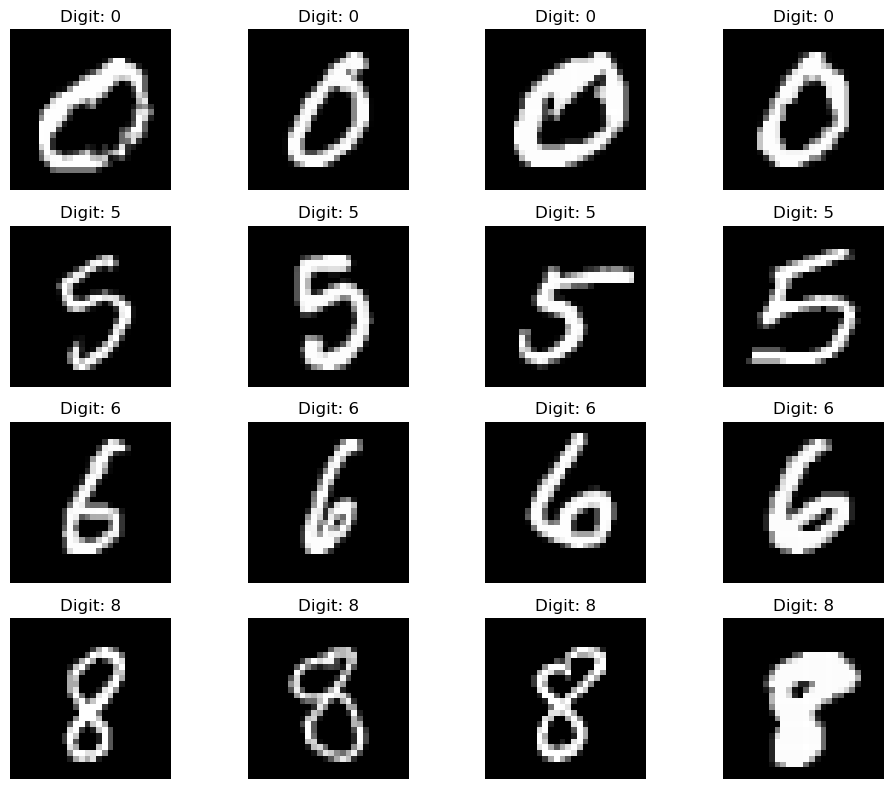

In [21]:
digits = [0, 5, 6, 8]
examples_per_digit = 4
indices = {}
for digit in digits:
    indices[digit] = mnist_train[mnist_train['response'] == digit].index[:examples_per_digit]
fig, axes = plt.subplots(nrows=len(digits), ncols=examples_per_digit, figsize=(10, 8))

for row, digit in enumerate(digits):
    for col in range(examples_per_digit):
        idx = indices[digit][col]
        image = mnist_train.loc[idx, mnist_train.columns[1:-1]].values.reshape(28, 28)
        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].set_title(f'Digit: {digit}')
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()


In [24]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare data for training
X = mnist_train.drop(['Unnamed: 0', 'response'], axis=1)
y = mnist_train['response']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=419)

# Model A: Random Forest with 5 estimators
model_A = RandomForestClassifier(n_estimators=5, random_state=419)
model_A.fit(X_train, y_train)
y_pred_A = model_A.predict(X_test)
accuracy_A = accuracy_score(y_test, y_pred_A)

# Model B: Random Forest with 5 estimators and max depth 4
model_B = RandomForestClassifier(n_estimators=5, max_depth=4, random_state=419)
model_B.fit(X_train, y_train)
y_pred_B = model_B.predict(X_test)
accuracy_B = accuracy_score(y_test, y_pred_B)

# Model C: Random Forest with 5 estimators and cost complexity tuning
model_C = RandomForestClassifier(n_estimators=5, ccp_alpha=0.0001, random_state=419)
model_C.fit(X_train, y_train)
y_pred_C = model_C.predict(X_test)
accuracy_C = accuracy_score(y_test, y_pred_C)

# Model D: Random Forest with 50 estimators and max depth
model_D = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=419)
model_D.fit(X_train, y_train)
y_pred_D = model_D.predict(X_test)
accuracy_D = accuracy_score(y_test, y_pred_D)

# Model E: Random Forest with 50 estimators and cost complexity tuning
model_E = RandomForestClassifier(n_estimators=50, ccp_alpha=0.0001, random_state=419)
model_E.fit(X_train, y_train)
y_pred_E = model_E.predict(X_test)
accuracy_E = accuracy_score(y_test, y_pred_E)

# Model F: AdaBoost Classifier
model_F = AdaBoostClassifier(n_estimators=50, random_state=419)
model_F.fit(X_train, y_train)
y_pred_F = model_F.predict(X_test)
accuracy_F = accuracy_score(y_test, y_pred_F)

accuracy_A, accuracy_B, accuracy_C, accuracy_D, accuracy_E, accuracy_F


(0.93375, 0.87125, 0.93375, 0.96625, 0.9775, 0.885)

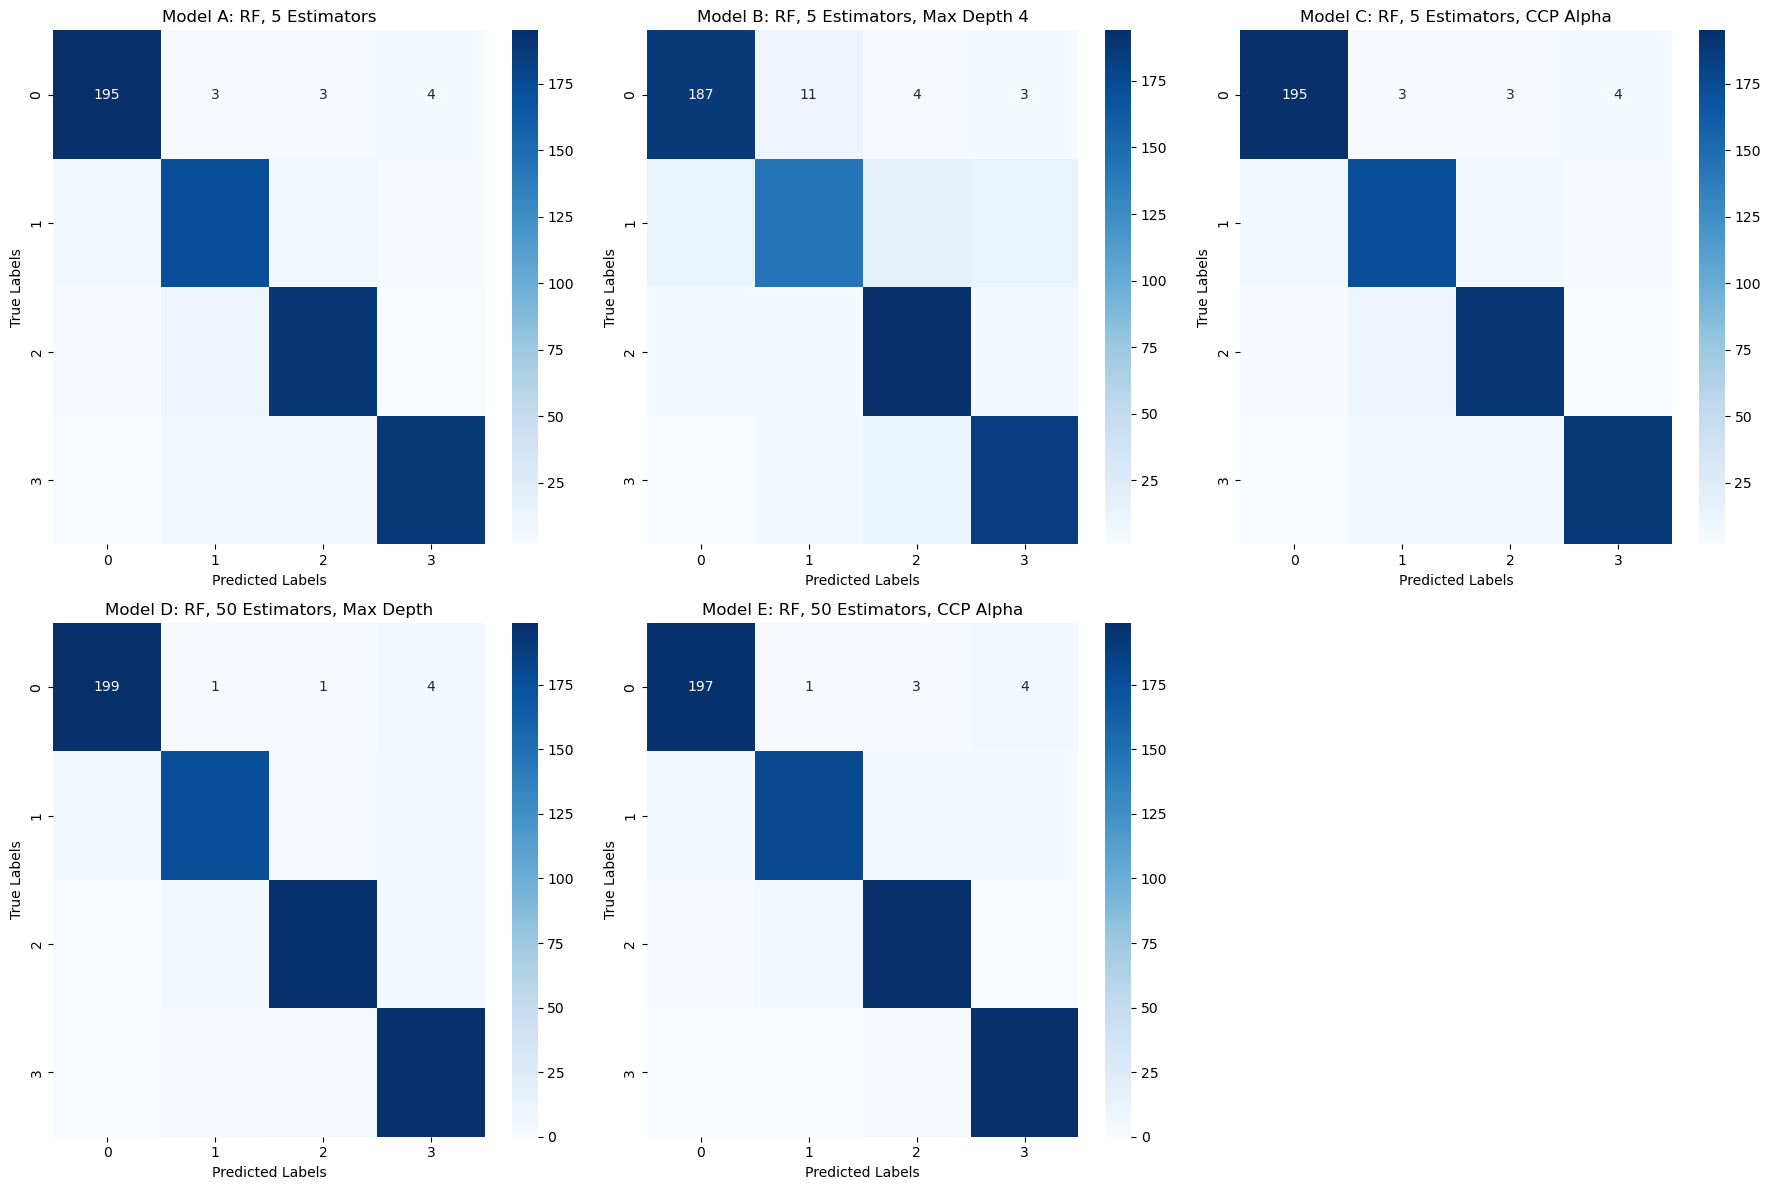

In [27]:
# Prepare the new test set for model evaluation
from sklearn.metrics import confusion_matrix
import seaborn as sns
mnist_test_data = pd.read_csv('/Users/giovannimaya/Downloads/MNIST_test.csv')

X_test_new = mnist_test_data.drop(['Unnamed: 0', 'response'], axis=1)
y_test_new = mnist_test_data['response']

# Predict with each model on the new test set
y_pred_A_new = model_A.predict(X_test_new)
y_pred_B_new = model_B.predict(X_test_new)
y_pred_C_new = model_C.predict(X_test_new)
y_pred_D_new = model_D.predict(X_test_new)
y_pred_E_new = model_E.predict(X_test_new)

# Compute confusion matrices for each random forest model on the new test set
cm_A_new = confusion_matrix(y_test_new, y_pred_A_new)
cm_B_new = confusion_matrix(y_test_new, y_pred_B_new)
cm_C_new = confusion_matrix(y_test_new, y_pred_C_new)
cm_D_new = confusion_matrix(y_test_new, y_pred_D_new)
cm_E_new = confusion_matrix(y_test_new, y_pred_E_new)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Titles for the models
model_titles_new = [
    'Model A: RF, 5 Estimators',
    'Model B: RF, 5 Estimators, Max Depth 4',
    'Model C: RF, 5 Estimators, CCP Alpha',
    'Model D: RF, 50 Estimators, Max Depth',
    'Model E: RF, 50 Estimators, CCP Alpha',
    'Empty'  # Placeholder for the empty subplot
]

# Confusion matrix for each model
conf_matrices_new = [cm_A_new, cm_B_new, cm_C_new, cm_D_new, cm_E_new]

for ax, cm, title in zip(axes.flat, conf_matrices_new + [None], model_titles_new):
    if cm is not None:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(title)
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()


In [50]:
train_data = pd.read_csv('/Users/giovannimaya/Downloads/MNIST_train.csv')
test_data = pd.read_csv('/Users/giovannimaya/Downloads/MNIST_test.csv')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

train_data.drop(columns=['Unnamed: 0'], inplace=True)
test_data.drop(columns=['Unnamed: 0'], inplace=True)

X_train = train_data.drop('response', axis=1)
y_train = train_data['response']
X_test = test_data.drop('response', axis=1)
y_test = test_data['response']

models = {
    "A": RandomForestClassifier(n_estimators=5, random_state=419),
    "B": RandomForestClassifier(n_estimators=5, max_depth=4, random_state=419),
    "C": RandomForestClassifier(n_estimators=5, ccp_alpha=0.01, random_state=419),  
    "D": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=419),   
    "E": RandomForestClassifier(n_estimators=50, ccp_alpha=0.01, random_state=419), 
    "F": AdaBoostClassifier(random_state=419) 
}

confusion_matrices = {}
model_accuracies = {}
plt.figure(figsize=(20, 15))
for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)
    model_accuracies[name] = accuracy_score(y_test, y_pred)
    print(confusion_matrices[name])
    """plt.subplot(2, 3, idx + 1)
    sns.heatmap(confusion_matrices[name], annot=True, fmt='g', cmap="Blues")  # 'g' ensures all numbers are displayed
    plt.title('Confusion Matrix for Model ' + name)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')"""


plt.tight_layout()
plt.show()

[[196   2   1   6]
 [  5 179   1   3]
 [  1   7 192   5]
 [  2   5   6 189]]
[[186   7   6   6]
 [ 11 154  12  11]
 [  7   6 191   1]
 [  0   6  11 185]]
[[188   6   3   8]
 [ 10 155  12  11]
 [  6   6 188   5]
 [  0   3   8 191]]
[[197   1   3   4]
 [  3 181   0   4]
 [  1   4 198   2]
 [  0   0   2 200]]
[[195   1   5   4]
 [  9 167   5   7]
 [  3   5 192   5]
 [  0   3   6 193]]
[[191  10   2   2]
 [  6 148  11  23]
 [  5   9 189   2]
 [  0  11   2 189]]


<Figure size 2000x1500 with 0 Axes>

['A', 'B', 'C', 'D', 'E', 'F'] [0.945, 0.895, 0.9025, 0.97, 0.93375, 0.89625]


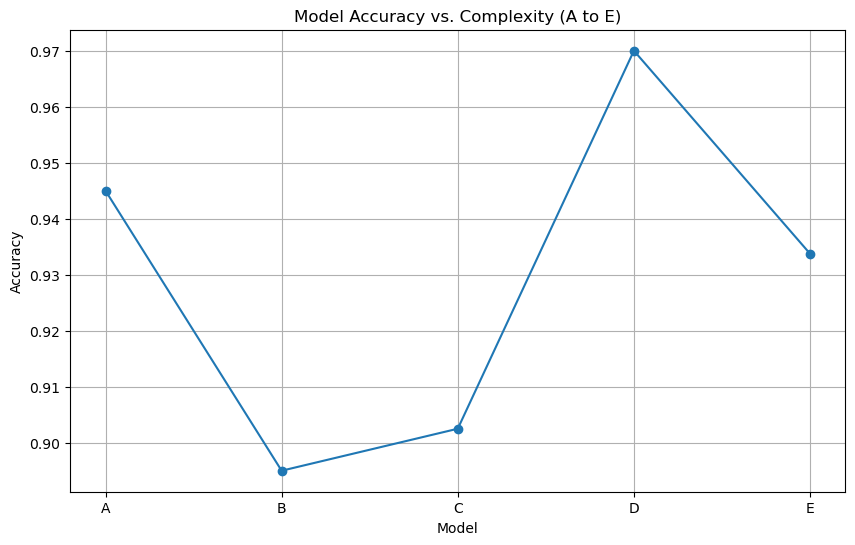

In [51]:
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())
print(model_names, accuracies)

model_names = model_names[:-1]
accuracies = accuracies[:-1]


plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o')
plt.title('Model Accuracy vs. Complexity (A to E)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
